In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import sys
import os
from tqdm import tqdm
import seaborn as sns

In [6]:
sys.path.append("..")
raw_test_data_path = os.path.join("..", "data", "raw", "test_dataset")
raw_full_data_path = os.path.join("..", "data", "raw", "full_dataset")
processed_test_data_path = os.path.join("..", "data", "processed", "test_dataset")
processed_full_data_path = os.path.join("..", "data", "processed", "full_dataset")

### Uwaga
Ta funkcja align_image_2 nie chciała tutaj się odpalić w ogóle ... 

In [7]:
sys.path.append("..")
from src.data.preprocessing import norm, mass_mean, rotate, align_image_2, preprop

In [8]:
def simple_preprocessing(img: np.ndarray) -> np.ndarray:
    img = norm(img)
    img = mass_mean(img)
    img = rotate(img)
    return img

In [9]:
for filename in tqdm(os.listdir(raw_full_data_path)):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(raw_full_data_path, filename), cv2.IMREAD_GRAYSCALE)
        # Uncoment below to use simple_preprocessing
        # img = simple_preprocessing(img)
        img = preprop(img)
        cv2.imwrite(os.path.join(processed_full_data_path, filename), img)

print("\nPreprocessing done!\n")

100%|██████████| 9/9 [00:00<00:00, 22671.91it/s]


Preprocessing done!



## Full dataset preprocessing

In [10]:
for img_anomaly_type in os.listdir(raw_full_data_path):
    for dir_number in os.listdir(os.path.join(raw_full_data_path, img_anomaly_type)):
        for img_number in os.listdir(os.path.join(raw_full_data_path, img_anomaly_type, dir_number)):
            img_path = os.path.join(raw_full_data_path, img_anomaly_type, dir_number, img_number)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = preprop(img)
            cv2.imwrite(os.path.join(processed_full_data_path, img_number), img)

In [21]:
def signaltonoise(img: np.ndarray) -> float:
    signal = np.mean(img[:])
    noise = np.std(img[:])
    return 10*math.log10(signal / noise)

In [36]:
stn_list = []

for filename in tqdm(os.listdir(processed_full_data_path)):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(processed_full_data_path, filename))
        stn = signaltonoise(img)
        stn_list.append((img, stn))

100%|██████████| 573335/573335 [03:07<00:00, 3059.94it/s]


In [37]:
print(f"Length: {len(stn_list)}")
print(f"Mean: {np.mean([x[1] for x in stn_list])}")
print(f"Max: {np.max([x[1] for x in stn_list])}")
print(f"Min: {np.min([x[1] for x in stn_list])}")

Length: 573335
Mean: -15.483904026408059
Max: 4.152472177059666
Min: -17.780909233264556


In [38]:
stn_list = sorted(stn_list, key=lambda x: x[1], reverse=True)

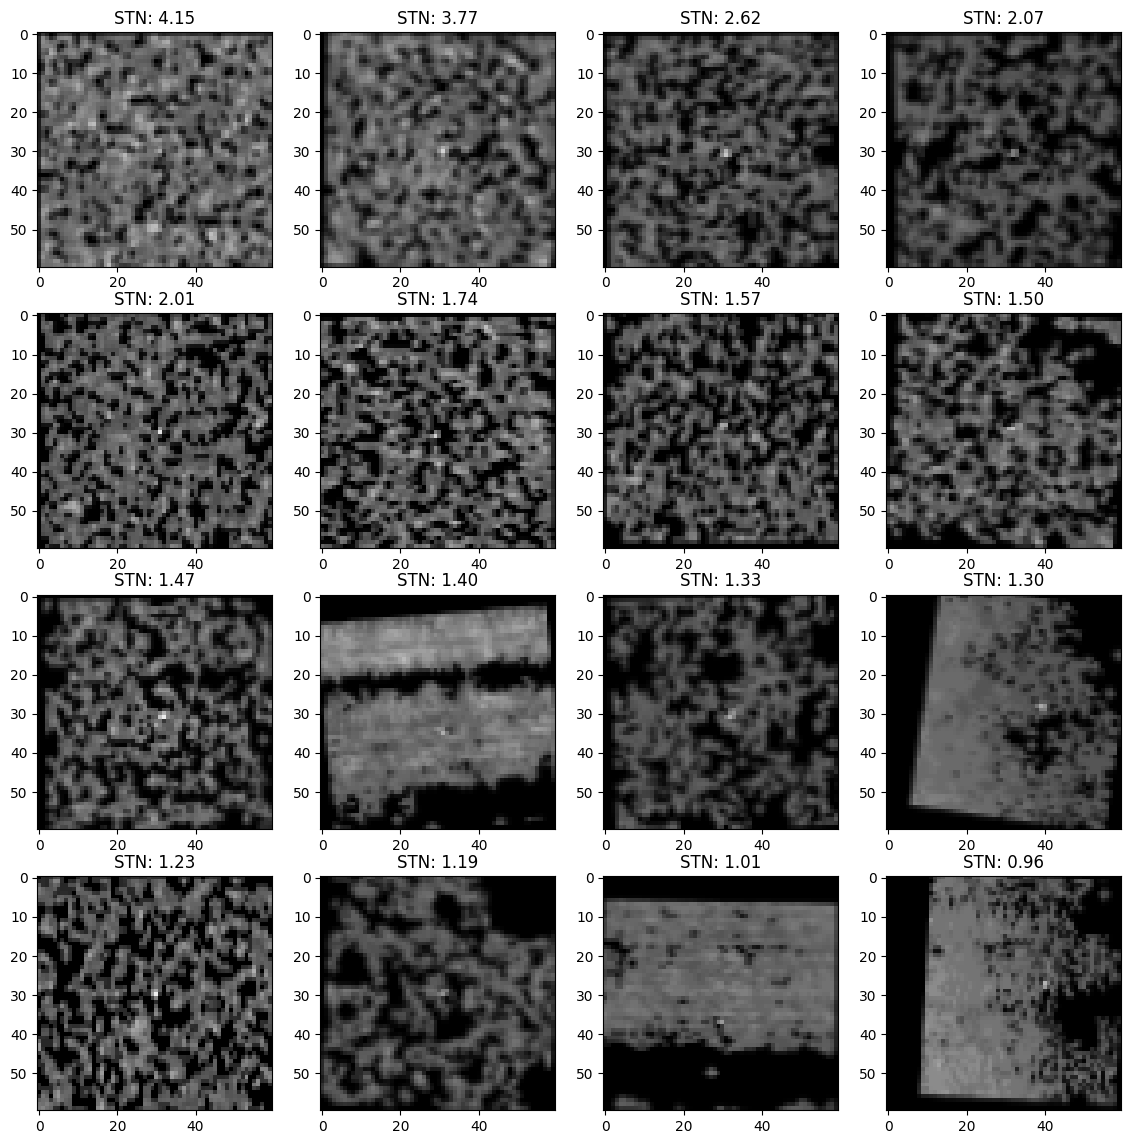

In [39]:
figX, axsX = plt.subplots(4, 4, figsize=(14, 14))

for i in range(4):
    for j in range(4):
        axsX[i, j].imshow(stn_list[4*i+j][0], cmap="gray")
        axsX[i, j].set_title(f"STN: {stn_list[4*i+j][1]:.2f}")

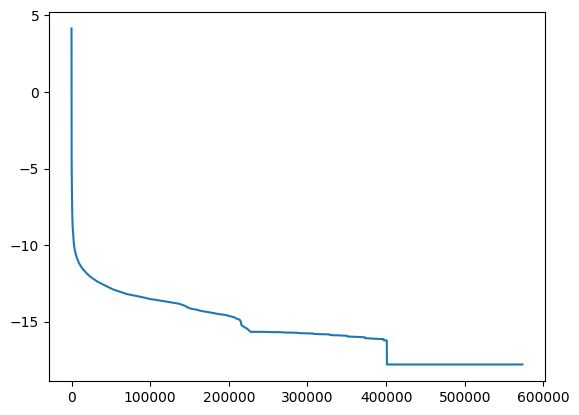

In [46]:
plt.plot([x[1] for x in stn_list]) 

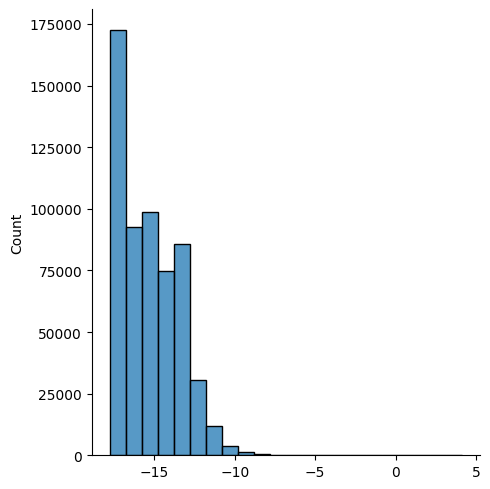

In [49]:
sns.displot([x[1] for x in stn_list], binwidth=1, bins=50)

## Punkt odcięcia

In [ ]:
STN_THRESHOLD = -7.5

In [17]:
data_after_threshold = [x for x in stn_list if x[1] < STN_THRESHOLD]

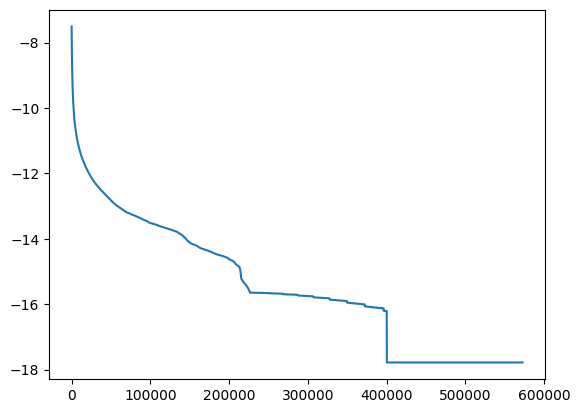

In [18]:
plt.plot([x[1] for x in data_after_threshold])

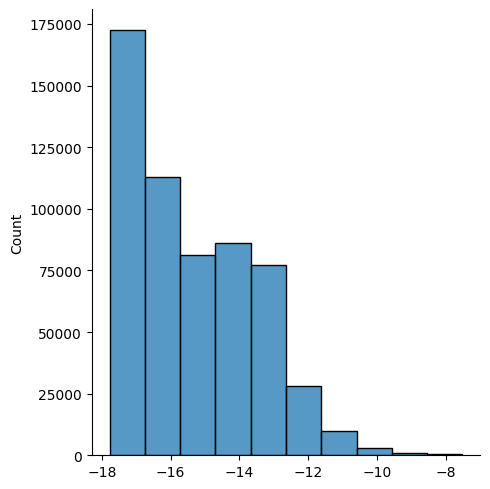

In [50]:
sns.displot([x[1] for x in data_after_threshold], binwidth=1, bins=50)

## Obrazki
Kilka obrazków z największym zaszumieniem po odcięciu parametrem STN_THRESHOLD

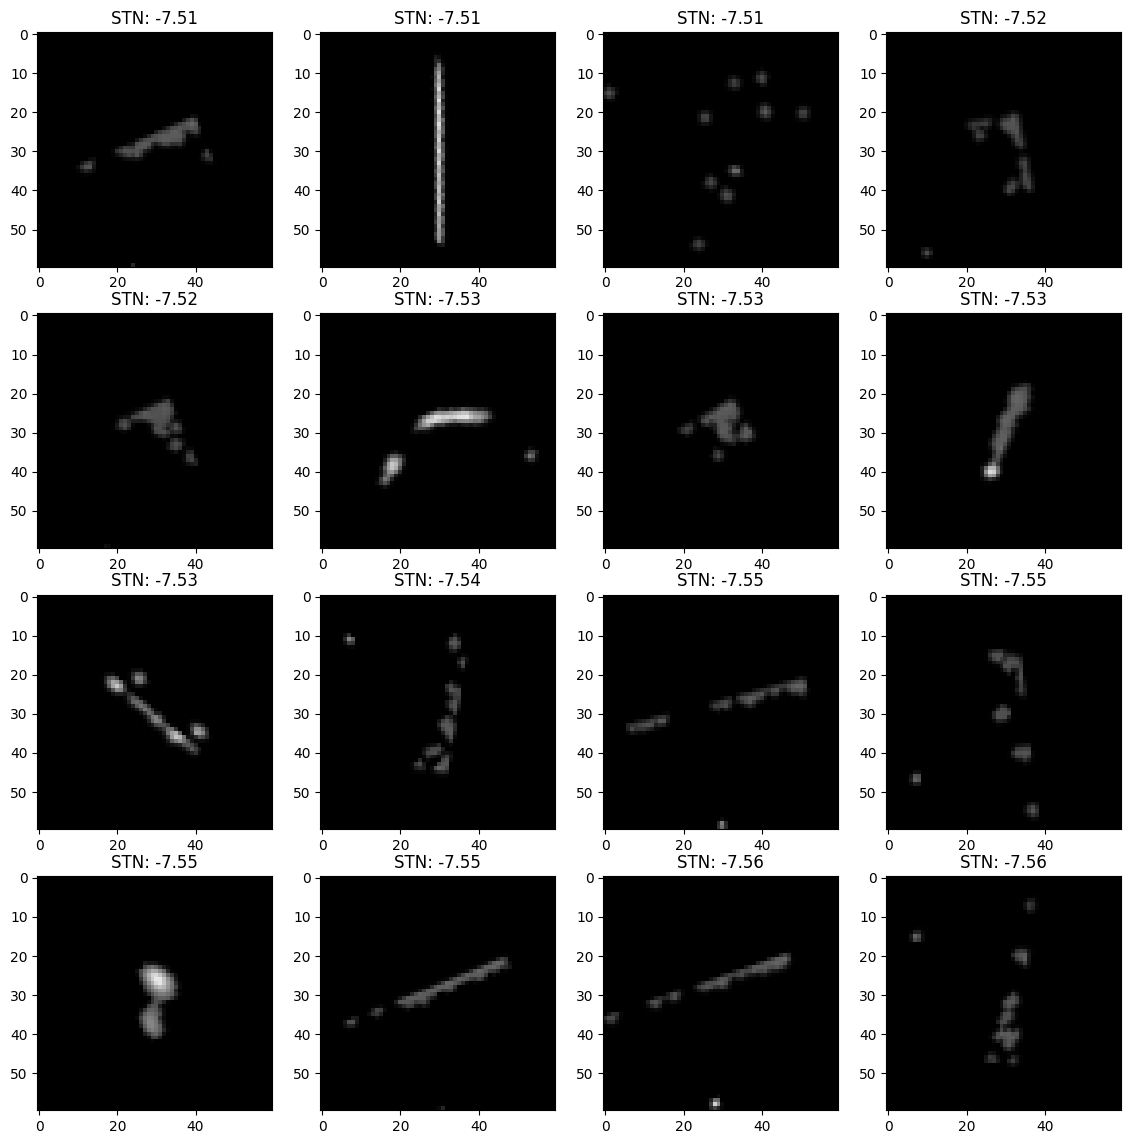

In [19]:
figX, axsX = plt.subplots(4, 4, figsize=(14, 14))

for i in range(4):
    for j in range(4):
        axsX[i, j].imshow(data_after_threshold[4*i+j][0], cmap="gray")
        axsX[i, j].set_title(f"STN: {data_after_threshold[4*i+j][1]:.2f}")

plt.show()

### Save files
Tworzymy nowy katalog i wrzucamy tam wszystkie zdjęcia po odcięciu, bez podziału na foldery

In [26]:
for index, img in tqdm(enumerate(data_after_threshold)):
    image_to_save = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
    cv2.imwrite(os.path.join('..', 'data', 'processed', 'stn_dataset', f"stn_{index}.png"), image_to_save)

572513it [01:55, 4938.94it/s]


In [33]:
img = cv2.imread('../data/processed/stn_dataset/stn_0.png', cv2.IMREAD_GRAYSCALE)
img.shape

(60, 60)